For this project you will visualize time series data using a line chart, bar chart, and box plots. You will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth.

We will do some commands to finish this task:
- Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the date column.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('fcc-forum-pageviews.csv'
               ,parse_dates=[0]
               ,index_col=[0])

In [3]:
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [4]:
df.dtypes

value    int64
dtype: object

- Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [5]:
print(df['value'].quantile(0.25))
print(df['value'].quantile(0.75))

35757.75
83883.0


In [6]:
incorrect=df[(df['value']>=df['value'].quantile(0.75)) |(df['value']<=df['value'].quantile(0.25)) ].index

In [7]:
df.drop(incorrect,inplace=True)

Create a draw_line_plot function that uses Matplotlib to draw a line chart, The label on the x axis should be Date and the label on the y axis should be Page Views.

Text(0, 0.5, 'Page Viwes')

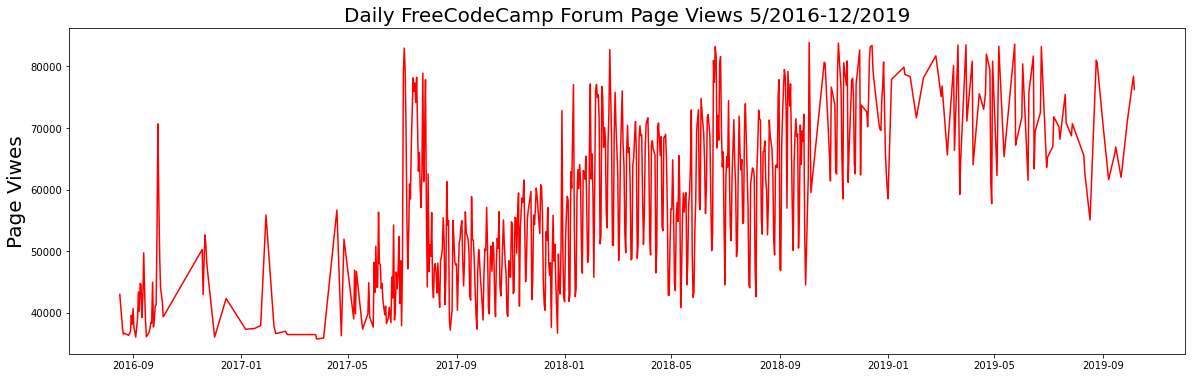

In [8]:
plt.figure(figsize=(20,6))
plt.title('Daily FreeCodeCamp Forum Page Views 5/2016-12/2019',size=20)
plt.plot(df,c='red')
plt.ylabel('Page Viwes',size=20)

Create a draw_bar_plot function that draws a bar chart. It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.

In [9]:
df['year']=df.index.year
df['month']=df.index.month

In [10]:
df.dtypes

value    int64
year     int64
month    int64
dtype: object

In [11]:
df_new=df

In [12]:
df_new=pd.pivot_table(df_new,index='year',columns='month',values='value',aggfunc=np.sum)

In [13]:
df_new

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,304919.0,1114635.0,174367.0,340355.0,78408.0
2017,168652.0,147955.0,72260.0,180873.0,419960.0,1204551.0,1956087.0,1479086.0,1358088.0,1470600.0,1481154.0,1397149.0
2018,1709634.0,1724455.0,1854863.0,1782293.0,1657071.0,1972906.0,1688617.0,1947780.0,1890239.0,570091.0,1445202.0,1463505.0
2019,373284.0,231487.0,794282.0,730065.0,429654.0,788420.0,562846.0,345117.0,460596.0,154652.0,NaN,NaN


In [14]:
df_new.rename(columns={1 : 'Jan',
                      2 : 'Feb',
                      3 : 'Mar',
                      4 : 'Apr',
                      5 : 'May',
                      6 : 'Jun',
                      7 : 'Jul',
                      8 : 'Aug',
                      9 : 'Sep',
                      10: 'Oct',
                      11: 'Nov',
                      12: 'Dec'
                     },inplace=True)

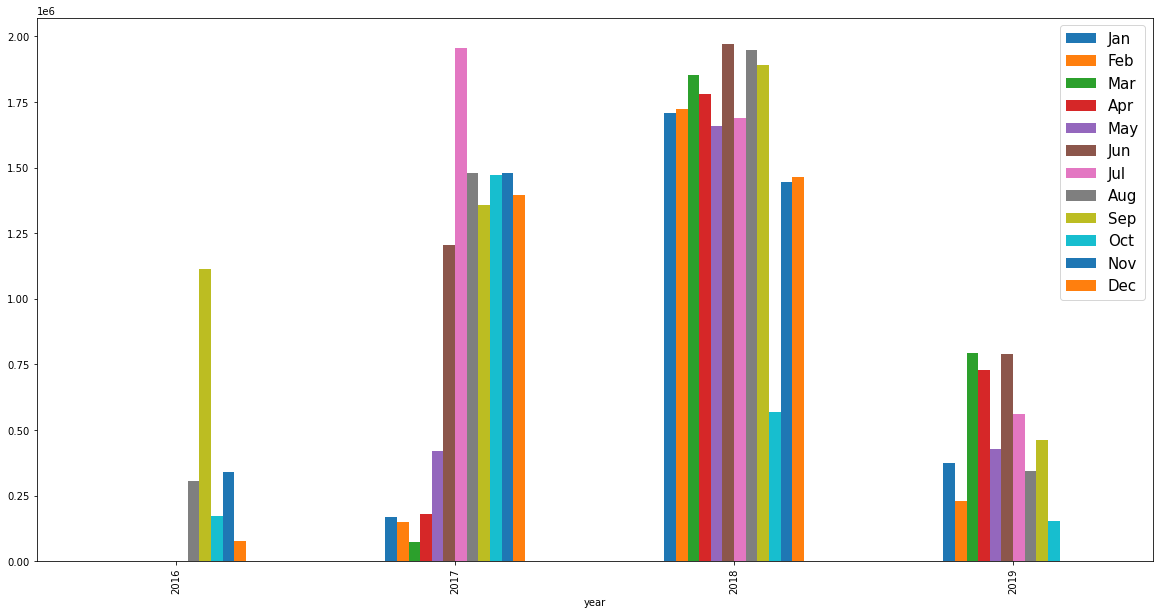

In [15]:
df_new.plot(kind='bar',figsize=(20,10))
plt.title('')
plt.legend(prop={'size':15})

Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots. These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data.

Text(0.5, 1.0, 'Month-wise Box Plot (Seasonality)')

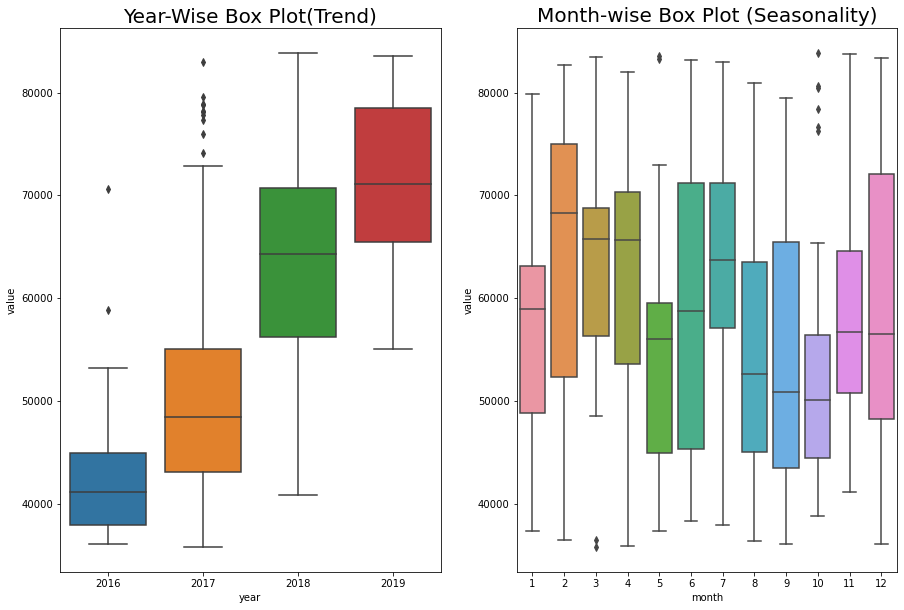

In [17]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.boxplot(data=df,x='year',y='value')
plt.title('Year-Wise Box Plot(Trend)',size=20)

plt.subplot(1,2,2)
sns.boxplot(data=df,x='month',y='value')
plt.title('Month-wise Box Plot (Seasonality)',size=20)

In [20]:
df.replace({1 : 'Jan',
                      2 : 'Feb',
                      3 : 'Mar',
                      4 : 'Apr',
                      5 : 'May',
                      6 : 'Jun',
                      7 : 'Jul',
                      8 : 'Aug',
                      9 : 'Sep',
                      10: 'Oct',
                      11: 'Nov',
                      12: 'Dec'
                     },inplace=True)

In [21]:
month_dict={'Jan':1,'Feb':2,'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}

In [22]:
df=df.sort_values('month',key=lambda x:x.apply(lambda x:month_dict[x]))

Text(0.5, 1.0, 'Month-wise Box Plot (Seasonality)')

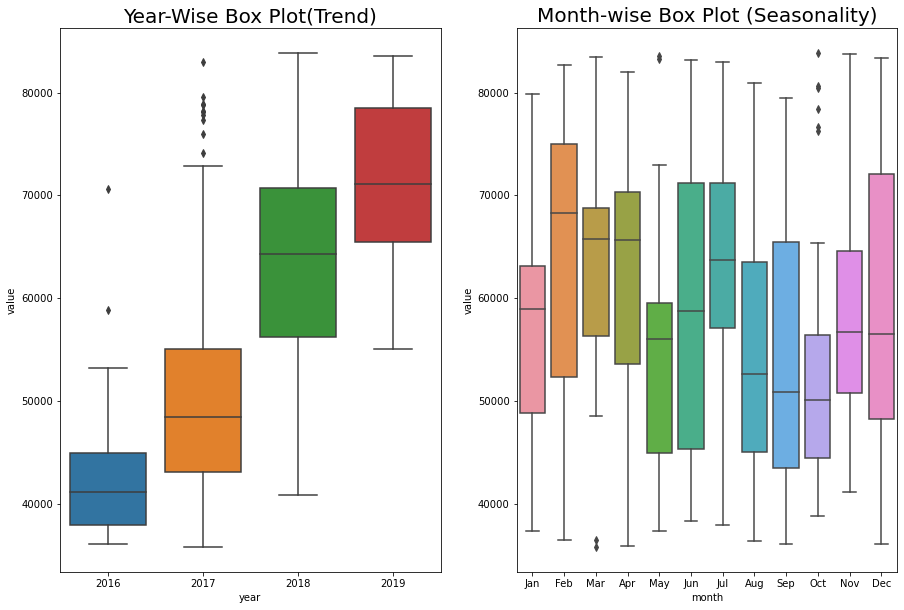

In [23]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.boxplot(data=df,x='year',y='value')
plt.title('Year-Wise Box Plot(Trend)',size=20)

plt.subplot(1,2,2)
sns.boxplot(data=df,x='month',y='value')
plt.title('Month-wise Box Plot (Seasonality)',size=20)

In this task, we could use some features of data visualization and analysis to explain some Queastions around this dataset.